In [2]:
%matplotlib inline

                                   uranus                model                ratio
                mass            14.525969            14.525969             1.000000
              radius           2.5362e+09          2.49668e+09             1.015831
               gsurf           900.760174           929.505337             0.969075



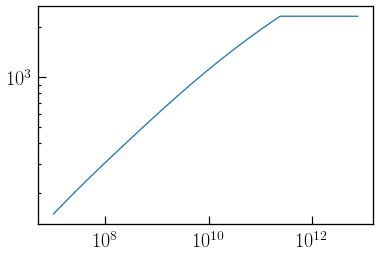

In [62]:
'''rough static model for present-day uranus'''

import ongp; reload(ongp) # reload to catch any changes to the module

mu = const.uranus_mass / const.mearth # 14.5
ru = const.uranus_rvol
gu = (const.cgrav * const.uranus_mass / const.uranus_rvol ** 2)

f = ongp.evol(z_eos_option='reos water', atm_option='f11_tables u')
f.static(mtot='u', mcore=13, zenv=0.1, t10=150.)

'''the large `core' mass means H/He envelope extends only to relatively low pressures
(e.g., p ~ 0.1 Mbar) which seems necessary to avoid going off the scvh tables
by being too cold at P > 11.4 Mbar. this issue usually manifests as nans in grada.'''


print '%20s %20s %20s %20s' % ('', 'uranus', 'model', 'ratio')
print '%20s %20f %20f %20f' % ('mass', mu, f.mtot / const.mearth, mu / f.mtot * const.mearth)
print '%20s %20g %20g %20f' % ('radius', ru, f.rtot, ru / f.rtot)
print '%20s %20f %20f %20f' % ('gsurf', gu, f.surface_g, gu / f.surface_g)
print 

plt.loglog(f.p, f.t)


512 2502793704.32 0.986828209258
1024 2496675746.87 0.984415955709
2048 2493805855.02 0.983284384126
4096 2492420716.54 0.982738236945
8192 2491741070.87 0.982470258999
16384 2491419815.31 0.982343590926


Text(0,0.5,'$\\rho\\ (\\rm g\\ cm^{-3})$')

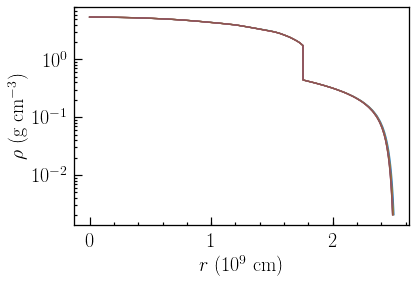

In [6]:
'''a quick spatial resolution test for the static uranus'''
import ongp
reload(ongp)
for nz in (512, 1024, 2048, 4096, 8192, 16384):
    u = ongp.evol(nz=nz, z_eos_option='reos water', atm_option='f11_tables u')
    u.static(mtot='u', mcore=13., zenv=0.1, t10=150.)

    plt.semilogy(u.r * 1e-9, u.rho)
    print nz, u.rtot, u.rtot / const.uranus_rvol
    
plt.xlabel(r'$r\ (10^9\ {\rm cm})$')
plt.ylabel(r'$\rho\ (\rm g\ cm^{-3})$')

840.0 181.71604445
150.0 59.3555192211


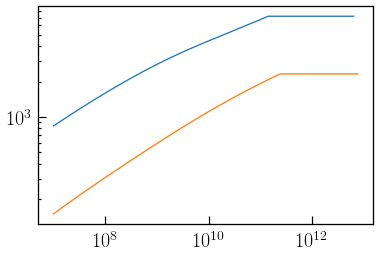

In [9]:
''' before try to evolve, verify that starting / ending t10s give calculable static models'''

u = ongp.evol(z_eos_option='reos water', atm_option='f11_tables u')

u.static(mtot='u', mcore=13., zenv=0.1, t10=840.)
print u.t10, u.teff
plt.loglog(u.p, u.t)

u.static(mtot='u', mcore=13., zenv=0.1, t10=150.)
print u.t10, u.teff
plt.loglog(u.p, u.t)


In [23]:
import ongp
reload(ongp)
u = ongp.evol(z_eos_option='reos water', atm_option='f11_tables u')
h = u.run(mtot='u', mcore=13., zenv=0.1, start_t=840., nsteps=100, end_t=150., which_t='t10', include_core_entropy=True)

        step        iters           t1          t10         teff       radius       s_mean        dt_yr      age_gyr  nz_gradient     nz_shell       y_surf     walltime 
           0           24       -1.000      840.000      181.716    3.790e+09       42.713    0.000e+00        0.000            0            0        0.270        0.261
           1           24       -1.000      825.509      179.904    3.759e+09       42.702    1.308e+06        0.001            0            0        0.270        0.515
           2           23       -1.000      811.268      178.120    3.730e+09       42.692    1.373e+06        0.003            0            0        0.270        0.760
           3           23       -1.000      797.273      176.365    3.700e+09       42.681    1.445e+06        0.004            0            0        0.270        1.005
           4           22       -1.000      783.519      174.638    3.672e+09       42.670    1.516e+06        0.006            0            0        0.27

Text(0.5,1,'Uranus')

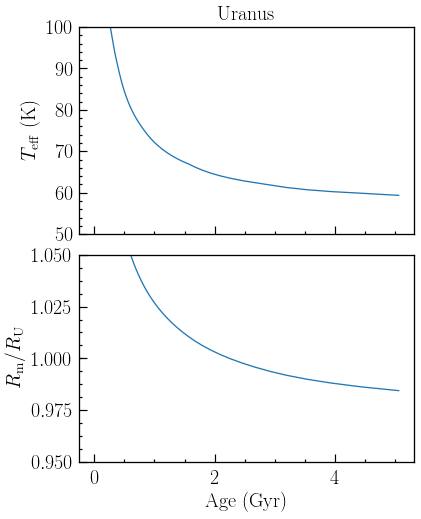

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8), gridspec_kw={'hspace':0.1}, sharex=True)

ax[0].plot(h['age'], h['teff'])
ax[1].plot(h['age'], h['radius'] / const.uranus_rvol)

ax[0].set_ylabel(r'$T_{\rm eff}\ (\rm K)$')
ax[1].set_ylabel(r'$R_{\rm m}/R_{\rm U}$')

ax[-1].set_xlabel(r'${\rm Age}\ ({\rm Gyr})$')

ax[0].set_ylim(50, 100)
ax[1].set_ylim(0.95, 1.05)
ax[0].set_title('Uranus')

# Neptune

                                  neptune                model                ratio
                mass            17.136236            17.136236             1.000000
              radius           2.4622e+09          2.45809e+09             1.001670
               gsurf          1127.456624          1131.225715             0.996668



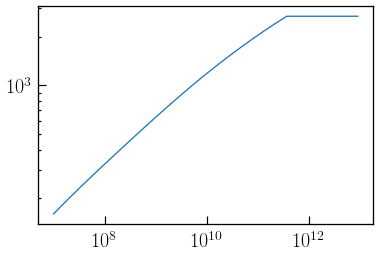

In [78]:
'''rough static model for present-day uranus'''

import ongp; reload(ongp) # reload to catch any changes to the module

mn = const.neptune_mass / const.mearth
rn = const.neptune_rvol
gn = const.cgrav * const.neptune_mass / const.neptune_rvol ** 2

g = ongp.evol(z_eos_option='reos water', atm_option='f11_tables n')
g.static(mtot='n', mcore=15, zenv=0.35, t10=160.)

print '%20s %20s %20s %20s' % ('', 'neptune', 'model', 'ratio')
print '%20s %20f %20f %20f' % ('mass', mn, g.mtot / const.mearth, mn / g.mtot * const.mearth)
print '%20s %20g %20g %20f' % ('radius', rn, g.rtot, rn / g.rtot)
print '%20s %20f %20f %20f' % ('gsurf', gn, g.surface_g, gn / g.surface_g)
print 

plt.loglog(g.p, g.t)


In [79]:
import ongp
reload(ongp)
n = ongp.evol(z_eos_option='reos water', atm_option='f11_tables n')
hn = n.run(mtot='n', mcore=15., zenv=0.35, start_t=840., nsteps=100, end_t=160., which_t='t10', include_core_entropy=True)

        step        iters           t1          t10         teff       radius       s_mean        dt_yr      age_gyr  nz_gradient     nz_shell       y_surf     walltime 
           0           23       -1.000      840.000      190.082    3.333e+09       42.245    0.000e+00        0.000            0            0        0.270        0.256
           1           23       -1.000      826.047      188.184    3.314e+09       42.234    1.914e+06        0.002            0            0        0.270        0.515
           2           22       -1.000      812.326      186.313    3.296e+09       42.224    2.013e+06        0.004            0            0        0.270        0.759
           3           22       -1.000      798.834      184.418    3.278e+09       42.213    2.095e+06        0.006            0            0        0.270        0.997
           4           22       -1.000      785.565      182.546    3.260e+09       42.202    2.190e+06        0.008            0            0        0.27

Text(0.5,1,'Neptune')

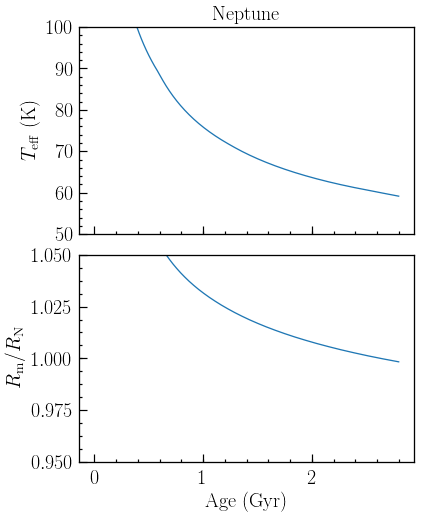

In [80]:
fig, ax = plt.subplots(2, 1, figsize=(6, 8), gridspec_kw={'hspace':0.1}, sharex=True)

ax[0].plot(hn['age'], hn['teff'])
ax[1].plot(hn['age'], hn['radius'] / const.neptune_rvol)

ax[0].set_ylabel(r'$T_{\rm eff}\ (\rm K)$')
ax[1].set_ylabel(r'$R_{\rm m}/R_{\rm N}$')

ax[-1].set_xlabel(r'${\rm Age}\ ({\rm Gyr})$')

ax[0].set_ylim(50, 100)
ax[1].set_ylim(0.95, 1.05)
ax[0].set_title('Neptune')